In [119]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import pydicom

In [ ]:
# checking all files downloaded

In [468]:
file_list = glob.glob("data/01-02-2022-23-56-08/dicom/*")
idx = 0
ct = []
st = []
while idx < len(file_list):

    data = pydicom.dcmread(file_list[idx])
    img = data.pixel_array[:,:,0]
    ct.append(data.ContentTime)
    st.append(data.SeriesTime)
    
    img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
    cv2.imshow('test', img)
    cv2.setWindowTitle('test', str(idx))
    
    key = cv2.waitKey(1)
    if key == ord('n'):
        idx += 1
        #print(idx, file_list[idx])
    if key == ord('b'):
        idx -= 1
    if key == ord('q'):
        break 
        
cv2.destroyAllWindows()    

<IPython.core.display.Javascript object>


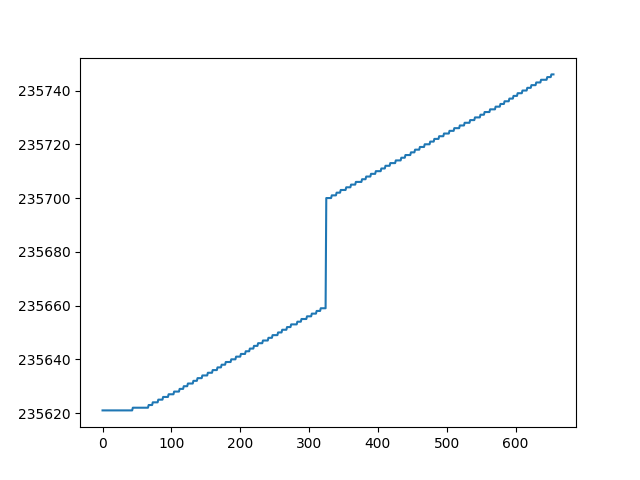

In [464]:
ct = np.array(ct).astype(int)
st = np.array(st).astype(int)
plt.plot(ct)
#plt.plot(st)
#plt.plot(np.diff(ct))
#plt.ylim([0,2])

# accumulate diff

In [272]:
file_list = glob.glob("data/dicom_sample/*")
for idx, file in enumerate(file_list):

    data = pydicom.dcmread(file)
    img = data.pixel_array[:,:,0]
    
    if idx == 0:
        accumulator = np.zeros(img.shape) 
    else:
        accumulator += np.abs(img - storage_image)/255
    storage_image = img.copy()
    
    img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
    cv2.imshow('test', img)
    
    key = cv2.waitKey(10)
    if key == ord('q'):
        break 
        
cv2.destroyAllWindows()    

In [191]:
mask_candidate1 = cv2.dilate((accumulator < len(file_list)/5).astype(np.uint8), np.ones((3,3), 'uint8'), iterations=3)

In [196]:
file_list = glob.glob("data/dicom_sample/*")
for idx, file in enumerate(file_list):

    data = pydicom.dcmread(file)
    img = data.pixel_array[:,:,0]
    img[np.where(mask_candidate1)] = 0
    
    img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
    cv2.imshow('test', img)
    
    key = cv2.waitKey(10)
    if key == ord('q'):
        break 
        
cv2.destroyAllWindows()    

# accumulate whites

In [193]:
file_list = glob.glob("data/dicom_sample/*")
for idx, file in enumerate(file_list):

    data = pydicom.dcmread(file)
    img = data.pixel_array[:,:,0]
    
    if idx == 0:
        accumulator = np.zeros(img.shape) 
    else:
        accumulator += img > 150
    
    img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
    cv2.imshow('test', img)
    
    key = cv2.waitKey(10)
    if key == ord('q'):
        break 
        
cv2.destroyAllWindows()    

In [194]:
mask_candidate2 = cv2.dilate((accumulator > len(file_list)/2).astype(np.uint8), np.ones((3,3), 'uint8'), iterations=3)

In [197]:
file_list = glob.glob("data/dicom_sample/*")
for idx, file in enumerate(file_list):

    data = pydicom.dcmread(file)
    img = data.pixel_array[:,:,0]
    img[np.where(mask_candidate2)] = 0
    
    img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
    cv2.imshow('test', img)
    
    key = cv2.waitKey(10)
    if key == ord('q'):
        break 
        
cv2.destroyAllWindows()    

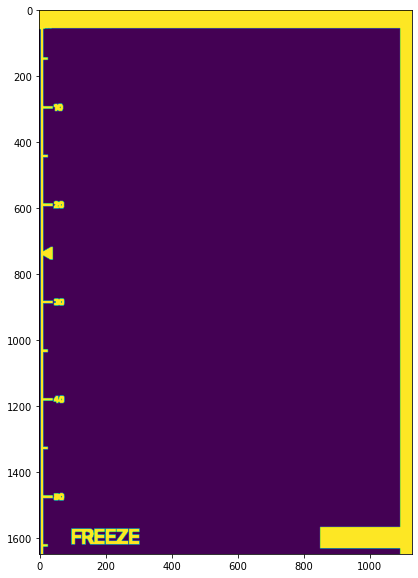

In [214]:
mc = np.load('55mm.npy')
plt.imshow(mc)

In [304]:
data = pydicom.dcmread(glob.glob("data/dicom_sample/*")[100])
image = data.pixel_array[:,:,0]
dX = data[0x0018,0x6011][0][0x0018, 0x602c].value/100
dY = data[0x0018,0x6011][0][0x0018, 0x602e].value/100

In [305]:
CamIntMat = np.eye(3) * [dX,dY,1]
CamIntMat

array([[3.393e-05, 0.000e+00, 0.000e+00],
       [0.000e+00, 3.393e-05, 0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00]])

In [306]:
Ys, Xs = np.meshgrid(range(image.shape[0]), range(image.shape[1]), indexing='ij')
print(Ys.shape, Xs.shape, image.shape)

(1647, 1128) (1647, 1128) (1647, 1128)


In [307]:
Ys = Ys.reshape((-1,1))
Xs = Xs.reshape((-1,1))
mc = mc.reshape((-1,1))
image_coords = np.hstack((np.hstack((Xs, Ys)), np.ones(Xs.shape[0])[:,None])).transpose()
image_coords = CamIntMat.dot(image_coords)[:-1,:]
image1 = image.reshape((-1,1))
print(mc.shape, Ys.shape, Xs.shape, image1.shape, image_coords.shape)
Ys = Ys[np.where(mc==0)]
Xs = Xs[np.where(mc==0)]
image1 = image1[np.where(mc==0)]
image_coords = image_coords[:,np.where(mc==0)[0]]
print(mc.shape, Ys.shape, Xs.shape, image1.shape, image_coords.shape)

(1857816, 1) (1857816, 1) (1857816, 1) (1857816, 1) (2, 1857816)
(1857816, 1) (1697044,) (1697044,) (1697044,) (2, 1697044)


<IPython.core.display.Javascript object>


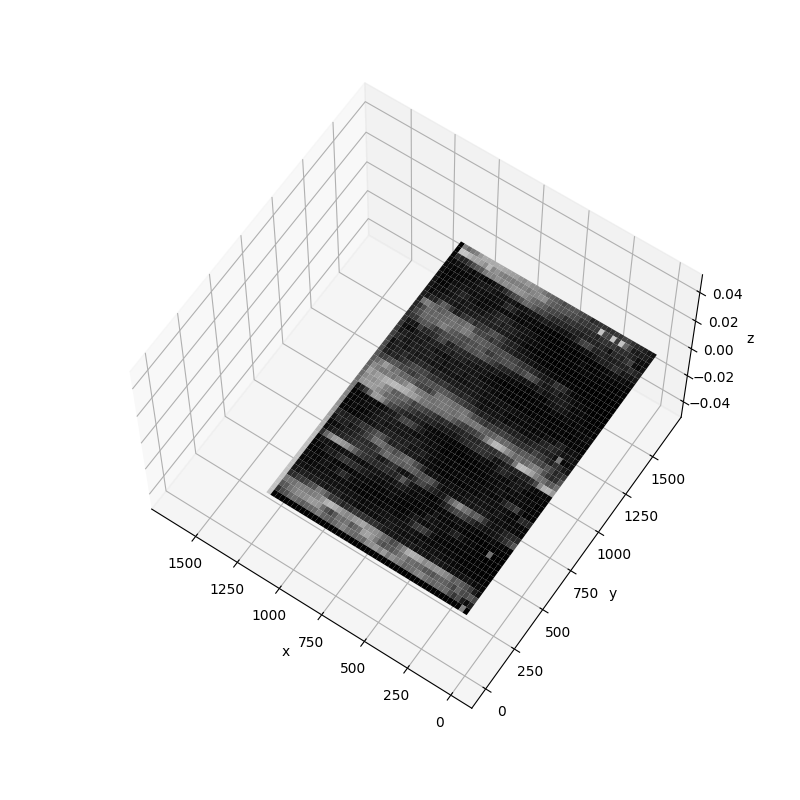

In [445]:
from matplotlib import cm

%matplotlib notebook
ax = plt.axes(projection='3d')
ax.figure.set_size_inches(8, 8)
ax.figure.set_dpi(100)
ax.view_init(elev=62, azim=-56)

ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');

#ax.scatter3D(image_coords[0,::], image_coords[1,::], c=image1[::], s=0.1)
#ax.scatter3D(image_coords[0,::30], image_coords[1,::30], c=image1[::30], s=0.2)

Yt, Xt = np.meshgrid(range(image.shape[0]), range(image.shape[1]), indexing='ij')
ax.plot_surface(Xt, Yt, np.zeros(Yt.shape), facecolors=(np.tile(image[:,:,None], (1,1,3))/255),
               linewidth=0, alpha=1, edgecolor=None)#, rstride=5, cstride=5)
ax.invert_yaxis()

In [ ]:
def preprocess_dicom(file_path, mask='55mm'):
    

<IPython.core.display.Javascript object>


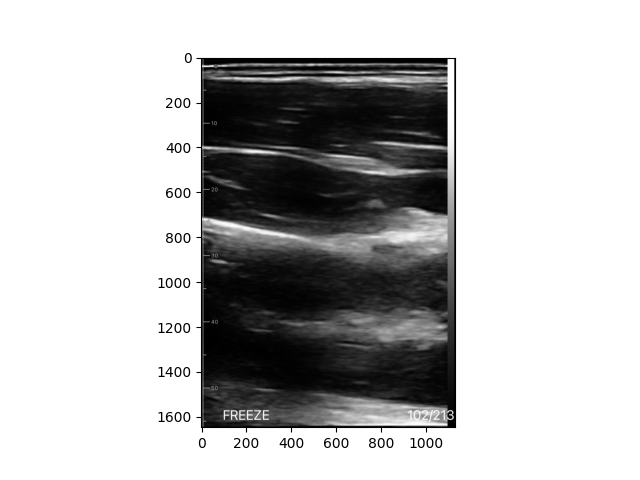

In [440]:
#plt.imshow(image)
plt.imshow(image/255, cmap='gray')

In [360]:
imaget[100,100]

(0.40784313725490196, 0.40784313725490196, 0.40784313725490196)


file:  data/dicom_sample\20220131095609.dcm
(1647, 1128, 3) 55 1 1 1 0 3
20220131 1.2.276.0.7230010.3.1.3.0.3981.1643594169.434872
0.003393 0.003393 095503 0 255

file:  data/dicom_sample\20220131095612.dcm
(1647, 1128, 3) 55 1 1 1 0 3
20220131 1.2.276.0.7230010.3.1.3.0.3981.1643594172.434875
0.003393 0.003393 095504 0 255

file:  data/dicom_sample\20220131095619.dcm
(1647, 1128, 3) 55 1 1 1 0 3
20220131 1.2.276.0.7230010.3.1.3.0.3981.1643594179.434878
0.003393 0.003393 095504 0 255

file:  data/dicom_sample\20220131095624.dcm
(1647, 1128, 3) 55 1 1 1 0 3
20220131 1.2.276.0.7230010.3.1.3.0.3981.1643594184.434881
0.003393 0.003393 095504 0 255

file:  data/dicom_sample\20220131095628.dcm
(1647, 1128, 3) 55 1 1 1 0 3
20220131 1.2.276.0.7230010.3.1.3.0.3981.1643594188.434884
0.003393 0.003393 095504 0 255

file:  data/dicom_sample\20220131095631.dcm
(1647, 1128, 3) 55 1 1 1 0 3
20220131 1.2.276.0.7230010.3.1.3.0.3981.1643594191.434887
0.003393 0.003393 095504 0 255

file:  data/dicom_sam

ValueError: num must be 1 <= num <= 10, not 11

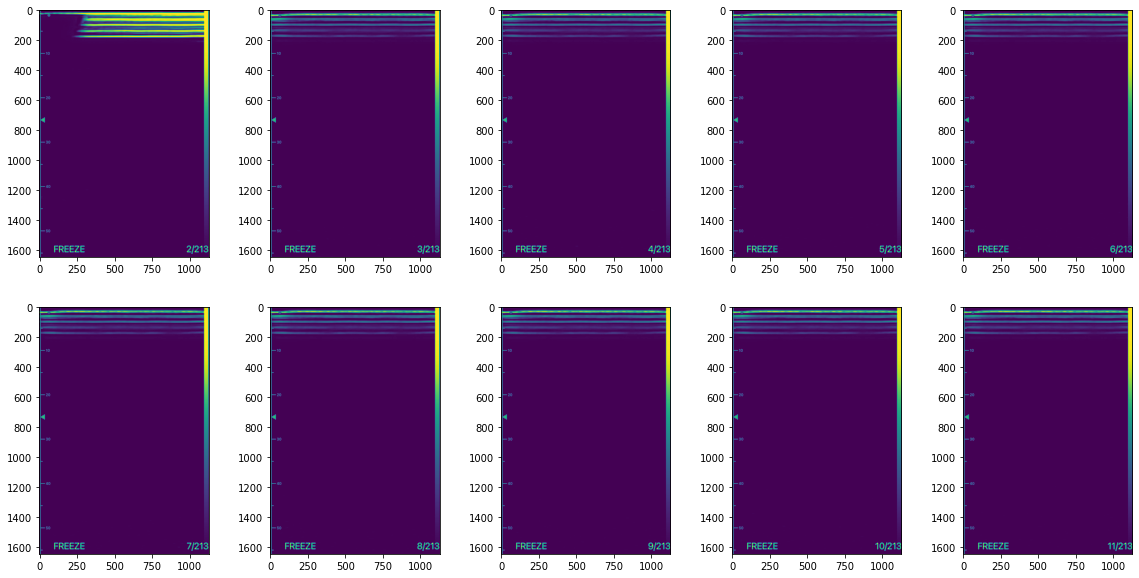

In [180]:
plt.rcParams['figure.figsize'] = [20, 10]
channel = 0

for idx, file in enumerate(glob.glob("data/dicom_sample/*")):
    print('\nfile: ', file)
    data = pydicom.dcmread(file)
    print(
      data.pixel_array.shape, data.DepthOfScanField, data.InstanceNumber, data.NumberOfFrames, 
      data.RescaleSlope, data.RescaleIntercept, data.SamplesPerPixel
     )
    print(data.SeriesDate, data.SeriesInstanceUID)
    dX = data[0x0018,0x6011][0][0x0018, 0x602c].value
    dY = data[0x0018,0x6011][0][0x0018, 0x602e].value
    print(dX, dY, data.ContentTime, np.min(data.pixel_array[:,:,channel]), np.max(data.pixel_array[:,:,channel]))

    plt.subplot(2,5,idx+1)
    plt.imshow(data.pixel_array[:,:,channel])

In [68]:
data1 = pydicom.dcmread(glob.glob("data/dicom_sample/*")[0])
data2 = pydicom.dcmread(glob.glob("data/dicom_sample/*")[1])

In [70]:
data1

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Ultrasound Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.0.3027.1643545697.169777
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.4
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_364'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: Ultrasound Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.0.3027.1643545697.169777
(0008, 0020) Study Date            

In [115]:
1647 * 0.003393

5.588271000000001

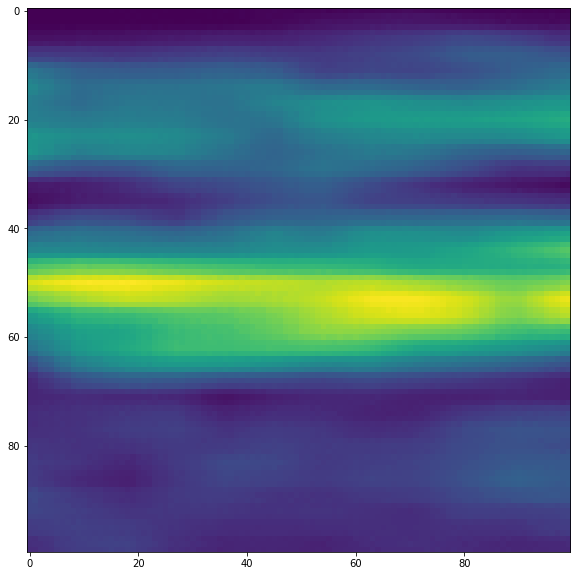

In [118]:
plt.imshow(data1.pixel_array[50:150,300:400,0])

In [114]:
while True:
    img = data.pixel_array
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imshow('test', img[:,:,2])
    key = cv2.waitKey(1)
    if key == ord('q'):
        break  
cv2.destroyAllWindows()

In [89]:
data.pixel_array.shape

(1647, 1128, 3)

In [107]:
px_flat = data.pixel_array.reshape(-1, 3)
np.max(px_flat, axis=0)

array([255, 129, 130], dtype=uint8)

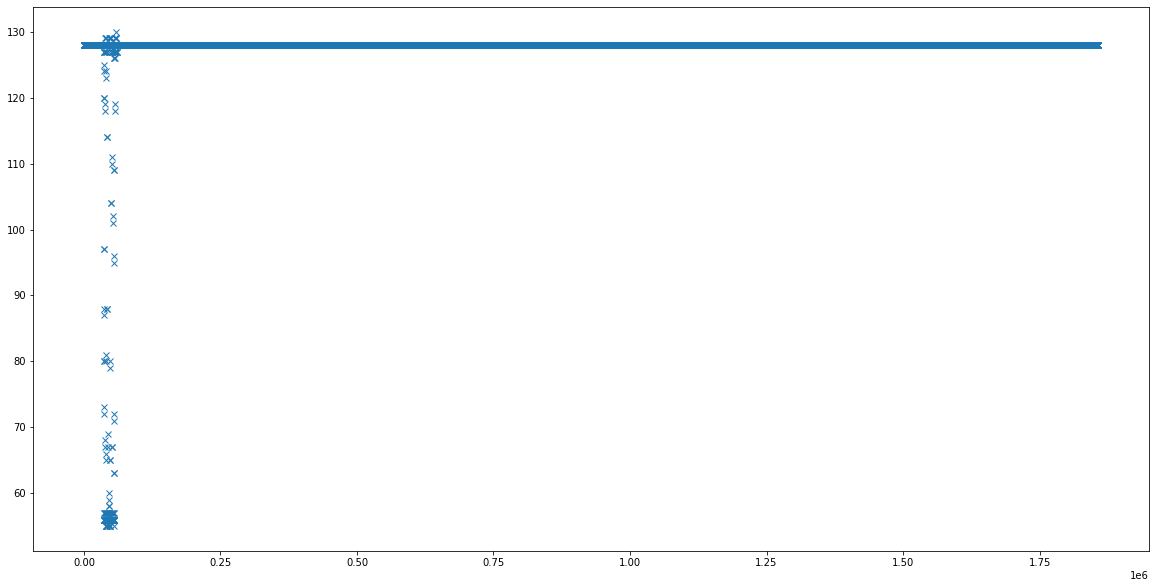

In [111]:
plt.plot(px_flat[:,2], 'x')